# TMDb movie data: Investigate a Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. I have chosen this dataset because I was curious to learn the various algorithms used by IMDB, Rotten Tomatoes, and Metacritic use to recommend a movie. I would also like to find other interesting patterns in this dataset that may come to light during the course of my analysis. I plan to explore the following questions on the dataset:

1. Which movie genres have the highest number of releases on a **year on year** and **all time** basis?
2. Which genres are most popular on a **year on year** and **all time** basis?
3. What kinds of properties are associated with movies that have high revenues?
4. How do **independent films** compare to **mainstream movies** in terms of **popularity**?

In [59]:
# Setup and import required packages

# For inline plots in the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# For DataFrames
import pandas as pd
import numpy as np

# For plots
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Required for unpacking of lists
from  itertools import chain

font = {'family' : 'DejaVu Sans',
        'size'   : 11}

# Settings for matplotlib
matplotlib.rc('font', **font)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [60]:
#Loading the data from the CSV file
TMDB_raw_data = pd.read_csv('tmdb-movies.csv')

#Settings to display all the columns of the dataset
pd.options.display.max_columns=25
pd.options.display.max_colwidth=35

#Displays the first 5 rows
TMDB_raw_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|v...,Twenty-two years after the even...,124,Action|Adventure|Science Fictio...,Universal Studios|Amblin Entert...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh ...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|d...,An apocalyptic story set in the...,120,Action|Adventure|Science Fictio...,Village Roadshow Pictures|Kenne...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kat...,http://www.thedivergentseries.m...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dysto...,Beatrice Prior must confront he...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carri...,http://www.starwars.com/films/s...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space op...,Thirty years after defeating th...,136,Action|Adventure|Science Fictio...,Lucasfilm|Truenorth Productions...,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason St...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense...,Deckard Shaw seeks revenge agai...,137,Action|Crime|Thriller,Universal Pictures|Original Fil...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [61]:
# Some descriptive statistics on the dataset
TMDB_raw_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [62]:
# number of columns
len(TMDB_raw_data.columns)

21

There are a total of 10866 rows and 21 columns in the dataset. This data will be trimmed and cleaned according to the analysis needs.

#### Problem 1:
It was mentioned in the dataset document that some of the columns contain multiple values separated by pipe (|) characters. The columns **cast, keywords, genres** and **production_companies** have these values. This is shown above.

In [63]:
# Checking if there are any NaN(empty cells) in the data.
print("Any NaN values in the data?", TMDB_raw_data.isnull().values.any())

# The total count of all NaN's in each column is displayed below
TMDB_raw_data.isnull().sum() 

Any NaN values in the data? True


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Problem 2:
Many columns in the dataset have NaN values as seen above. This may indicate that inadequate data is available about the specific entries. I will clean the columns that are required for my analysis.

In [64]:
# Checking for an zero values in the budget, revenue columns
print("Number of zero values in the budget column:",TMDB_raw_data[(TMDB_raw_data['budget']==0)].shape[0])
print("Number of zero values in the revenue column:",TMDB_raw_data[(TMDB_raw_data['revenue']==0)].shape[0])
print("Number of zero values in the release_year column:",TMDB_raw_data[(TMDB_raw_data['release_year']==0)].shape[0])

Number of zero values in the budget column: 5696
Number of zero values in the revenue column: 6016
Number of zero values in the release_year column: 0


#### Problem 3:
I checked the **budget, revenue** and **release_year** columns for any zero values in the data. I think this may be due to varying factors like the lack of information, or the movies that were never released. I have chosen to eradicate these values during the data cleaning phase.

#### Problem 4:
The columns **id, imdb_id, original_title, cast, homepage, director, tagline, overview, budget_adj, revenue_adj** and **vote_count** are not required for my analysis and I will drop these columns.

### Data Cleaning

First, I'll drop any columns irrelevant to my analysis,

In [65]:
TMDB_parsed_data = TMDB_raw_data.drop(['id', 'imdb_id', 'original_title', 'cast', 'homepage', 'director', 'tagline', \
                                    'overview', 'vote_count','budget_adj','revenue_adj'], axis=1)
TMDB_parsed_data.head()

,popularity,budget,revenue,keywords,runtime,genres,production_companies,release_date,vote_average,release_year
0,32.985763,150000000,1513528810,monster|dna|tyrannosaurus rex|v...,124,Action|Adventure|Science Fictio...,Universal Studios|Amblin Entert...,6/9/2015,6.5,2015
1,28.419936,150000000,378436354,future|chase|post-apocalyptic|d...,120,Action|Adventure|Science Fictio...,Village Roadshow Pictures|Kenne...,5/13/2015,7.1,2015
2,13.112507,110000000,295238201,based on novel|revolution|dysto...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville...,3/18/2015,6.3,2015
3,11.173104,200000000,2068178225,android|spaceship|jedi|space op...,136,Action|Adventure|Science Fictio...,Lucasfilm|Truenorth Productions...,12/15/2015,7.5,2015
4,9.335014,190000000,1506249360,car race|speed|revenge|suspense...,137,Action|Crime|Thriller,Universal Pictures|Original Fil...,4/1/2015,7.3,2015


Next, I'll convert the **keywords, production_companies** and **genres** into lists for easy access and parsing. Note that these columns have NaN values and the columns **keywords & production_companies** have 1493 and 1030 NaN's respectively. Eradicating these values would eradicate a large part of the dataset. I have chosen to drop these values during the analysis phase as needed for better results.

In [66]:
# function to convert to a list
def convert_to_list(data):
    try:
        return data.split('|')
    except ValueError:
        return None
    
# TMDB_Q1Q2_data represents the cleaned data required to answer questions 1 and 2
TMDB_Q1Q2_data = TMDB_parsed_data.copy()
TMDB_Q1Q2_data[['keywords','genres', 'production_companies']] = TMDB_Q1Q2_data[['keywords','genres', 'production_companies']].dropna().applymap(convert_to_list)
TMDB_Q1Q2_data.head()

,popularity,budget,revenue,keywords,runtime,genres,production_companies,release_date,vote_average,release_year
0,32.985763,150000000,1513528810,"[monster, dna, tyrannosaurus re...",124,"[Action, Adventure, Science Fic...","[Universal Studios, Amblin Ente...",6/9/2015,6.5,2015
1,28.419936,150000000,378436354,"[future, chase, post-apocalypti...",120,"[Action, Adventure, Science Fic...","[Village Roadshow Pictures, Ken...",5/13/2015,7.1,2015
2,13.112507,110000000,295238201,"[based on novel, revolution, dy...",119,"[Adventure, Science Fiction, Th...","[Summit Entertainment, Mandevil...",3/18/2015,6.3,2015
3,11.173104,200000000,2068178225,"[android, spaceship, jedi, spac...",136,"[Action, Adventure, Science Fic...","[Lucasfilm, Truenorth Productio...",12/15/2015,7.5,2015
4,9.335014,190000000,1506249360,"[car race, speed, revenge, susp...",137,"[Action, Crime, Thriller]","[Universal Pictures, Original F...",4/1/2015,7.3,2015


For Question 3, I would like to use the revenue data. This data contains some zeroes and I have chosen to eradicate them.

In [67]:
TMDB_Q3_data = TMDB_Q1Q2_data[TMDB_Q1Q2_data['revenue']!=0].copy()

# Number of rows eradicated
eradication_size = TMDB_Q1Q2_data.shape[0] - TMDB_Q3_data.shape[0]
print('The number of rows eradicated:',eradication_size)

The number of rows eradicated: 6016


For Question 3, I am also converting the popularity, budget, revenue and vote_average to standard deviation units for accurate plots.

In [68]:
# Function to convert the data into standard deviation units
def get_in_std_units(data):
    data = (data - data.mean())/data.std()
    return data

# Prevents warnings that TMDB_Q3_data is a copy
TMDB_Q3_data.is_copy = False
TMDB_Q3_data[['popularity','budget','revenue','vote_average']] = TMDB_Q3_data[['popularity','budget','revenue','vote_average']]\
                                                                    .apply(get_in_std_units)
TMDB_Q3_data.head()

,popularity,budget,revenue,keywords,runtime,genres,production_companies,release_date,vote_average,release_year
0,23.544158,2.972602,8.788316,"[monster, dna, tyrannosaurus re...",124,"[Action, Adventure, Science Fic...","[Universal Studios, Amblin Ente...",6/9/2015,0.439709,2015
1,20.178586,2.972602,1.784529,"[future, chase, post-apocalypti...",120,"[Action, Adventure, Science Fic...","[Village Roadshow Pictures, Ken...",5/13/2015,1.190840,2015
2,8.895144,1.985275,1.271177,"[based on novel, revolution, dy...",119,"[Adventure, Science Fiction, Th...","[Summit Entertainment, Mandevil...",3/18/2015,0.189332,2015
3,7.465568,4.206760,12.210633,"[android, spaceship, jedi, spac...",136,"[Action, Adventure, Science Fic...","[Lucasfilm, Truenorth Productio...",12/15/2015,1.691595,2015
4,6.110671,3.959928,8.743400,"[car race, speed, revenge, susp...",137,"[Action, Crime, Thriller]","[Universal Pictures, Original F...",4/1/2015,1.441217,2015


For Question 4, I will create a new column **'independent'** that is populated with the value *True* for **independent movies** and the value *False*  for **mainstream movies**

In [69]:
# Function that determines independent movies based on the keywords column
def independent_films(keywords):
    if 'independent film' in keywords:
        return True
    else:
        return False
    
# Made a copy of the keywords and release_year columns of the cleaned data
# This is the data for Question 4
TMDB_Q4_data = TMDB_Q1Q2_data[['keywords','release_year','popularity']].copy()

# Drop any NaN values and create a column "independent" with values
# 'True' for independent movies
# 'False' for mainstream movies
TMDB_Q4_data["independent"] = TMDB_Q4_data["keywords"].dropna().apply(independent_films)  

# Column "keywords" no longer required
TMDB_Q4_data = TMDB_Q4_data.drop("keywords", axis=1)

# Sample of first 5 rows
TMDB_Q4_data.head()

,release_year,popularity,independent
0,2015,32.985763,False
1,2015,28.419936,False
2,2015,13.112507,False
3,2015,11.173104,False
4,2015,9.335014,False


### Research Question 1 
**Which movie genres have the highest number of releases on a year on year and all time basis?**

In [70]:
# Got the necessary columns and filtered out any NaN values
TMDB_Q1_data = TMDB_Q1Q2_data[['release_year','genres']].dropna()

# Eradicated rows
rows_eradicated = TMDB_Q1Q2_data.shape[0] - TMDB_Q1_data.shape[0]
print('Number of rows eradicated:', rows_eradicated)

# Sample of first 5 values
TMDB_Q1_data.head()

Number of rows eradicated: 2164


,release_year,genres
0,2015,"[Action, Adventure, Science Fic..."
1,2015,"[Action, Adventure, Science Fic..."
2,2015,"[Adventure, Science Fiction, Th..."
3,2015,"[Action, Adventure, Science Fic..."
4,2015,"[Action, Crime, Thriller]"


Next, I will unpack the lists to get a count on the data.

In [71]:
# The function unpacks the lists in the dataframe by repeating the first key and iterating over the second
def unpack_list(data, key1, key2):
    new_df = pd.DataFrame({
        key1: np.repeat(data[key1].values, data[key2].str.len()),
        key2: list(chain.from_iterable(data[key2]))})
    return new_df

unpacked_df = unpack_list(TMDB_Q1_data, "release_year", "genres")
unpacked_df.head()

,genres,release_year
0,Action,2015
1,Adventure,2015
2,Science Fiction,2015
3,Thriller,2015
4,Action,2015


As you see above, the lists are unpacked with the corresponding years repeated. For the next step, I grouped the data by the **release_year** and **genres** columns, and then did a count on all the genres as shown below.

In [72]:
# Grouped by 'release_year','genres' columns
# Get a count on all the genres with the function agg()
# The count column is renamed to 'genres_count' using the function rename()
# The index is reset for further filtering using the function reset_index()
Grouped_Q1_Data = unpacked_df.groupby(['release_year','genres']).agg({'genres':'count'}) \
                        .rename(columns={'genres':'genres_count'}).reset_index()
    
# Print the first 10 rows
Grouped_Q1_Data.head(10)

,release_year,genres,genres_count
0,1960,Action,7
1,1960,Adventure,5
2,1960,Comedy,7
3,1960,Crime,2
4,1960,Drama,12
5,1960,Family,3
6,1960,Fantasy,2
7,1960,History,4
8,1960,Horror,7
9,1960,Music,1


As you can see above, I now have the count of all the genres based on the years. I will now use this data to find the max releases on a yearly basis.

In [73]:
# First Grouped_Q1_Data is grouped by the 'release_year' column
# Then with the idxmax() function, a DataFrame of  'release_year' and 'genres_count' is returned.
# I pass the indices to the iloc() function to retrieve the rows consisting of the genres with the 
# max releases every year

Result_Q1_Data = Grouped_Q1_Data.iloc[Grouped_Q1_Data.groupby('release_year').idxmax()['genres_count']]
Result_Q1_Data.head()

,release_year,genres,genres_count
4,1960,Drama,12
20,1961,Drama,16
36,1962,Drama,19
52,1963,Comedy,13
71,1964,Drama,20


The above data depicts the genres with the maximum releases on a yearly basis.

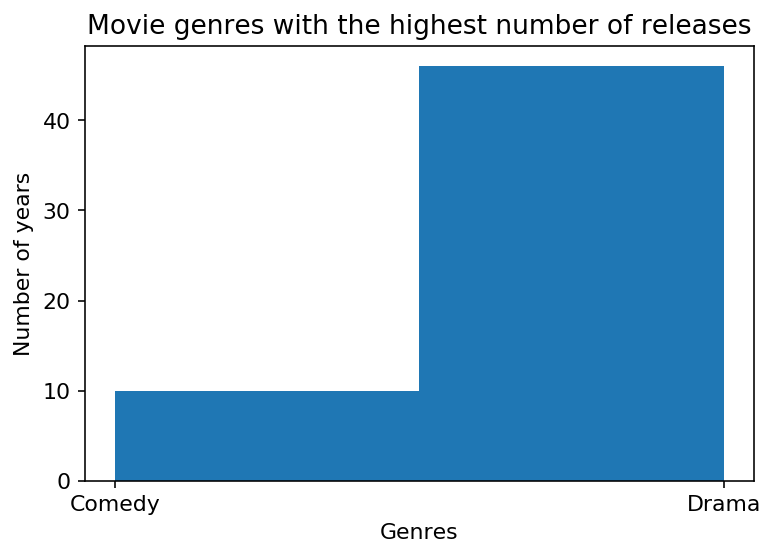

Number of years with the max releases:
Comedy: 10.0
Drama: 46.0


In [74]:
# Plot requires only 2 columns
Plot_Data = Result_Q1_Data[['release_year','genres']]
# Set index to release_year column
Plot_Data = Plot_Data.set_index('release_year')

# A histogram to depict the genres with all time highs
(n, bins, patches) = plt.hist(Plot_Data, bins = 2)
plt.title('Movie genres with the highest number of releases')
plt.ylabel('Number of years')
plt.xlabel('Genres')
plt.show()

# Peak values in the plot
print ("Number of years with the max releases:")
print ("Comedy:", n[0])
print ("Drama:", n[1])

#### Conclusion for question 1:
I can conclude that movies belonging to the Drama genre have had the highest number of releases(46 years) based on the dataset provided. Movies of the comedy genre come second(10 years). 

### Research Question 2 
**Which genres are most popular on a year on year and all time basis?**

Since I need to filter by popularity, I will choose the exceptionally popular movies i.e.,
For  $\alpha=0.95$ , $z=1.96$ 


In [75]:
TMDB_Q2_Data = TMDB_Q1Q2_data[['popularity','release_year','genres']].copy()
# convert popularity to standard deviation units
TMDB_Q2_Data['popularity'] = get_in_std_units(TMDB_Q2_Data['popularity'])
TMDB_Q2_Data.head()

,popularity,release_year,genres
0,32.333343,2015,"[Action, Adventure, Science Fic..."
1,27.768360,2015,"[Action, Adventure, Science Fic..."
2,12.463761,2015,"[Adventure, Science Fiction, Th..."
3,10.524717,2015,"[Action, Adventure, Science Fic..."
4,8.686967,2015,"[Action, Crime, Thriller]"


Next, I'll filter the rows and consider only the top 5% above the z-score of 1.96

In [76]:
# Extract the top 5% of movies based on popularity and drop any rows with NaN values in the genres column
z = 1.96
TMDB_Q2_Data = TMDB_Q2_Data[TMDB_Q2_Data['popularity']>z].dropna()

I will unpack the lists of the genres column as shown below,

In [77]:
# Unpack the genres lists using the function created in Question 1
unpacked_df = unpack_list(TMDB_Q2_Data, "release_year", "genres")
unpacked_df.head()

,genres,release_year
0,Action,2015
1,Adventure,2015
2,Science Fiction,2015
3,Thriller,2015
4,Action,2015


In [78]:
# Grouped by 'release_year','genres' columns
# Get a count on all the genres with the function agg()
# The count column is renamed to 'genres_count' using the function rename()
# The index is reset for further filtering using the function reset_index()
Grouped_Q2_Data_YoY = unpacked_df.groupby(['release_year','genres']).agg({'genres':'count'}) \
                        .rename(columns={'genres':'genres_count'}).reset_index()
    
# Print the genres with highest revenue in the year 2015
Grouped_Q2_Data_YoY[Grouped_Q2_Data_YoY['release_year'] == 2015]

,release_year,genres,genres_count
317,2015,Action,23
318,2015,Adventure,21
319,2015,Animation,4
320,2015,Comedy,14
321,2015,Crime,10
322,2015,Drama,25
323,2015,Family,6
324,2015,Fantasy,7
325,2015,History,2
326,2015,Horror,1


As seen in the sample data above, there are many popular movie genres on a year to year basis. I have displayed only the results of the year 2015. I will continue my analysis by taking the genre totals over the period 1960-2015. 

In [79]:
# Grouped by 'genres' columns
# Get a count on all the genres with the function agg()
# The count column is renamed to 'genres_count' using the function rename()
# The index is reset for further filtering using the function reset_index()
Grouped_Q2_Data = unpacked_df.groupby(['genres']).agg({'genres':'count'}) \
                        .rename(columns={'genres':'genres_count'}).reset_index()
    
# Print the first 10 rows of the all time data
Grouped_Q2_Data.head(10)

,genres,genres_count
0,Action,155
1,Adventure,137
2,Animation,40
3,Comedy,78
4,Crime,50
5,Drama,108
6,Family,58
7,Fantasy,69
8,History,4
9,Horror,14


As seen in the data above, movies of the **action & adventure genres** are the most popular genres during the period 1960-2015.

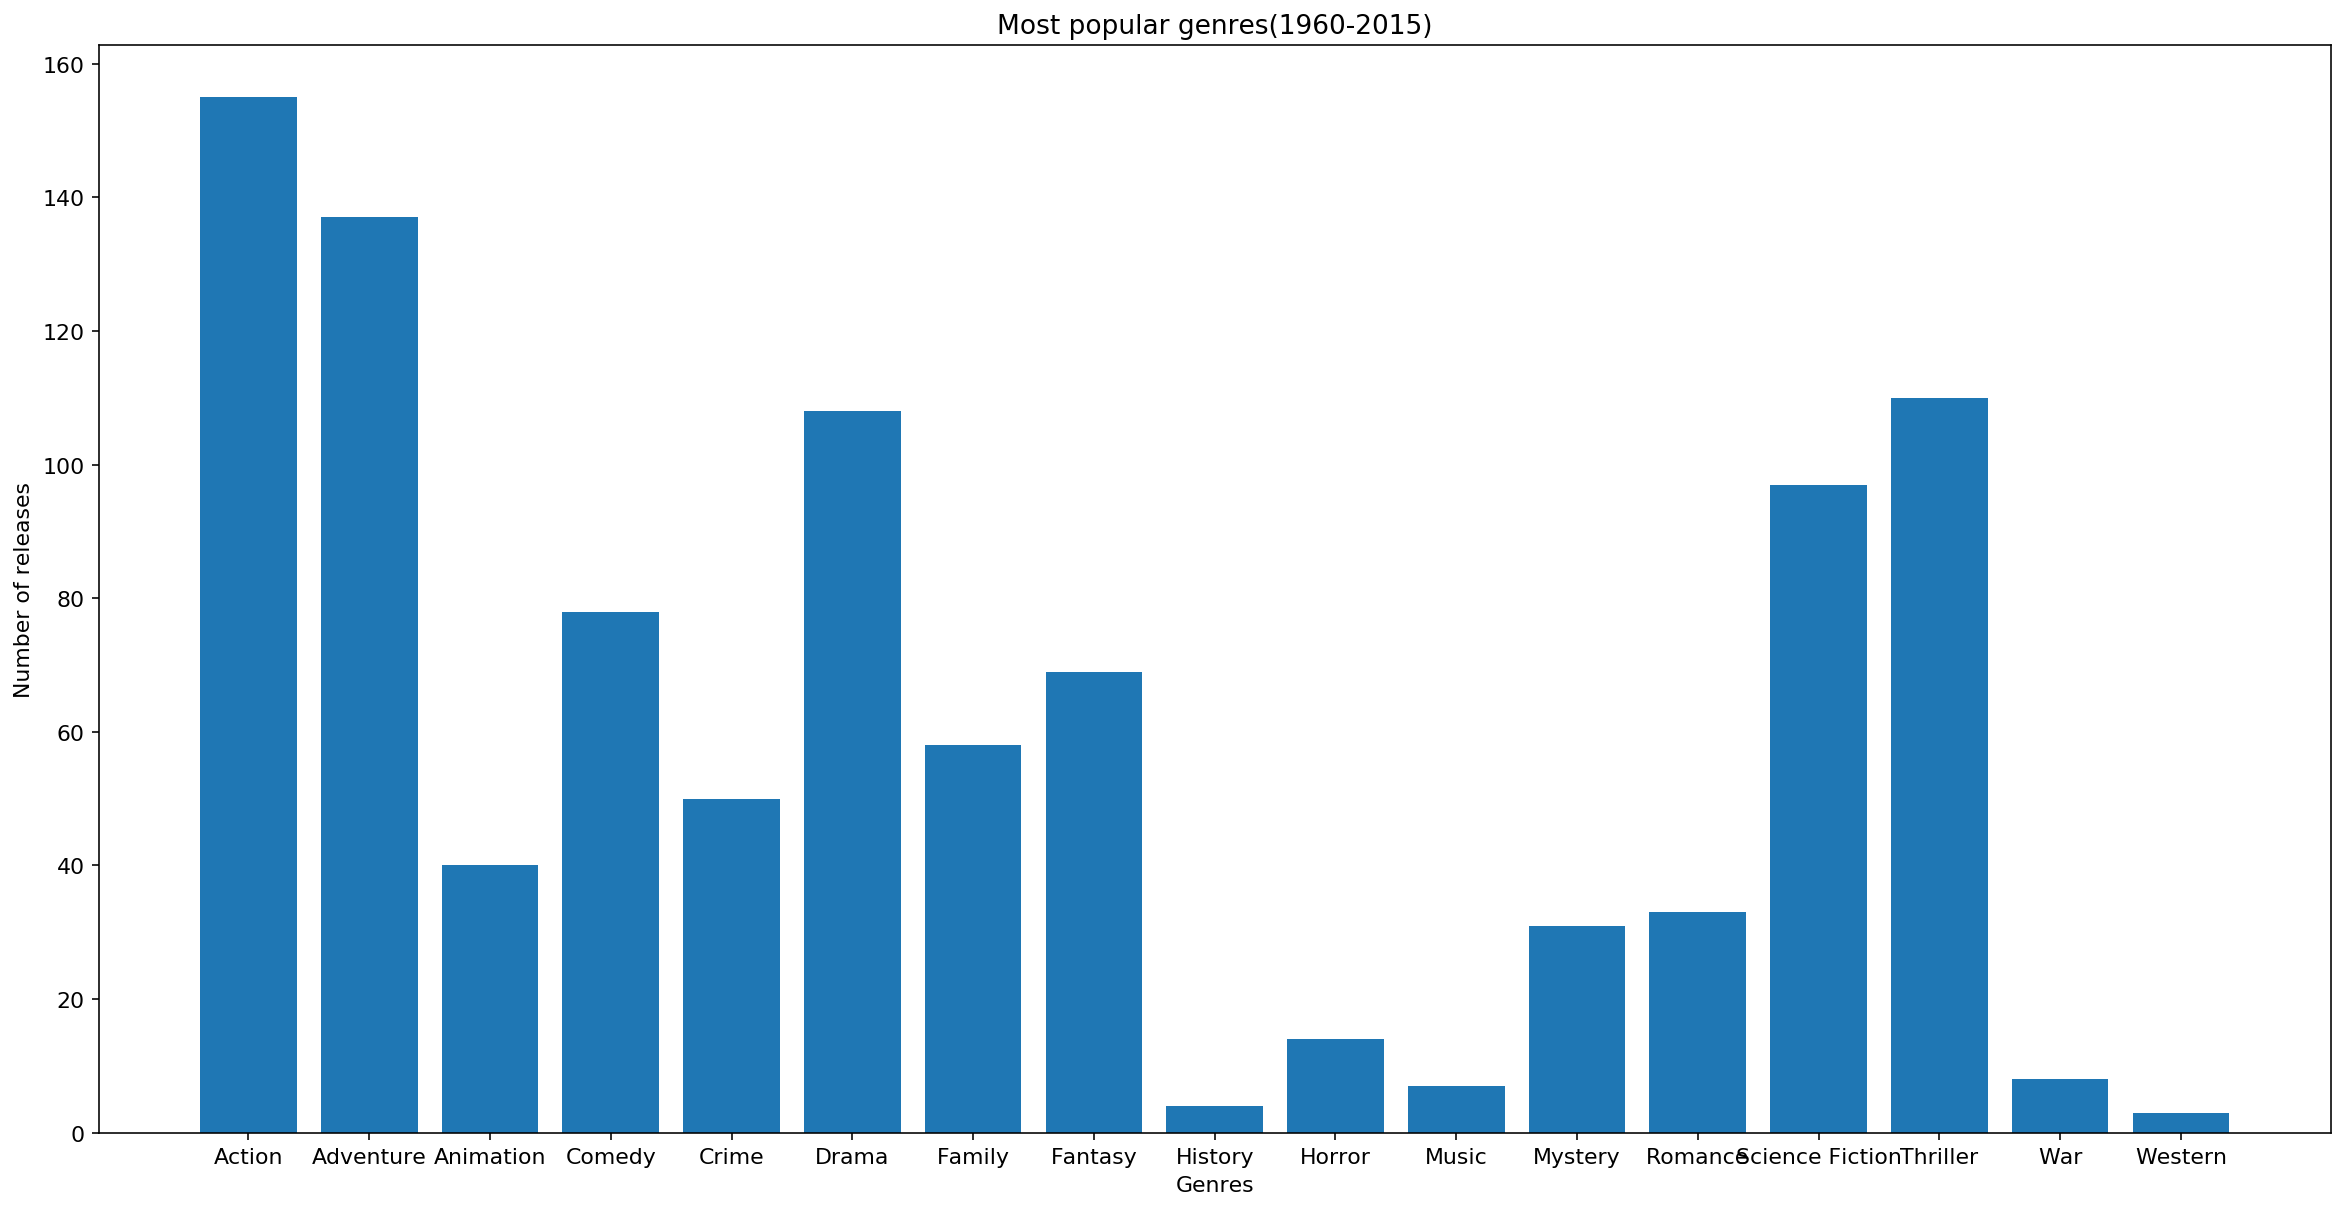

In [80]:
plt.figure(figsize = (20,10))
plt.bar(Grouped_Q2_Data['genres'], Grouped_Q2_Data['genres_count'])
plt.title('Most popular genres(1960-2015)')
plt.xlabel('Genres')
plt.ylabel('Number of releases')
plt.show()

#### Conclusion for question 2:
Based on the plot, I can conclude that action movies are the most popular genre closely followed by adventure movies.

### Research Question 3
**What kinds of properties are associated with movies that have high revenues?**

I will use the data to generate various plots from which I can make inferences. 

*Do note that **popularity, budget, revenue** and **vote_average** columns have been converted to **standard deviation** units during the data cleaning phase*

In [81]:
# Data to be used for the plots
TMDB_Q3_data.head()

,popularity,budget,revenue,keywords,runtime,genres,production_companies,release_date,vote_average,release_year
0,23.544158,2.972602,8.788316,"[monster, dna, tyrannosaurus re...",124,"[Action, Adventure, Science Fic...","[Universal Studios, Amblin Ente...",6/9/2015,0.439709,2015
1,20.178586,2.972602,1.784529,"[future, chase, post-apocalypti...",120,"[Action, Adventure, Science Fic...","[Village Roadshow Pictures, Ken...",5/13/2015,1.190840,2015
2,8.895144,1.985275,1.271177,"[based on novel, revolution, dy...",119,"[Adventure, Science Fiction, Th...","[Summit Entertainment, Mandevil...",3/18/2015,0.189332,2015
3,7.465568,4.206760,12.210633,"[android, spaceship, jedi, spac...",136,"[Action, Adventure, Science Fic...","[Lucasfilm, Truenorth Productio...",12/15/2015,1.691595,2015
4,6.110671,3.959928,8.743400,"[car race, speed, revenge, susp...",137,"[Action, Crime, Thriller]","[Universal Pictures, Original F...",4/1/2015,1.441217,2015


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


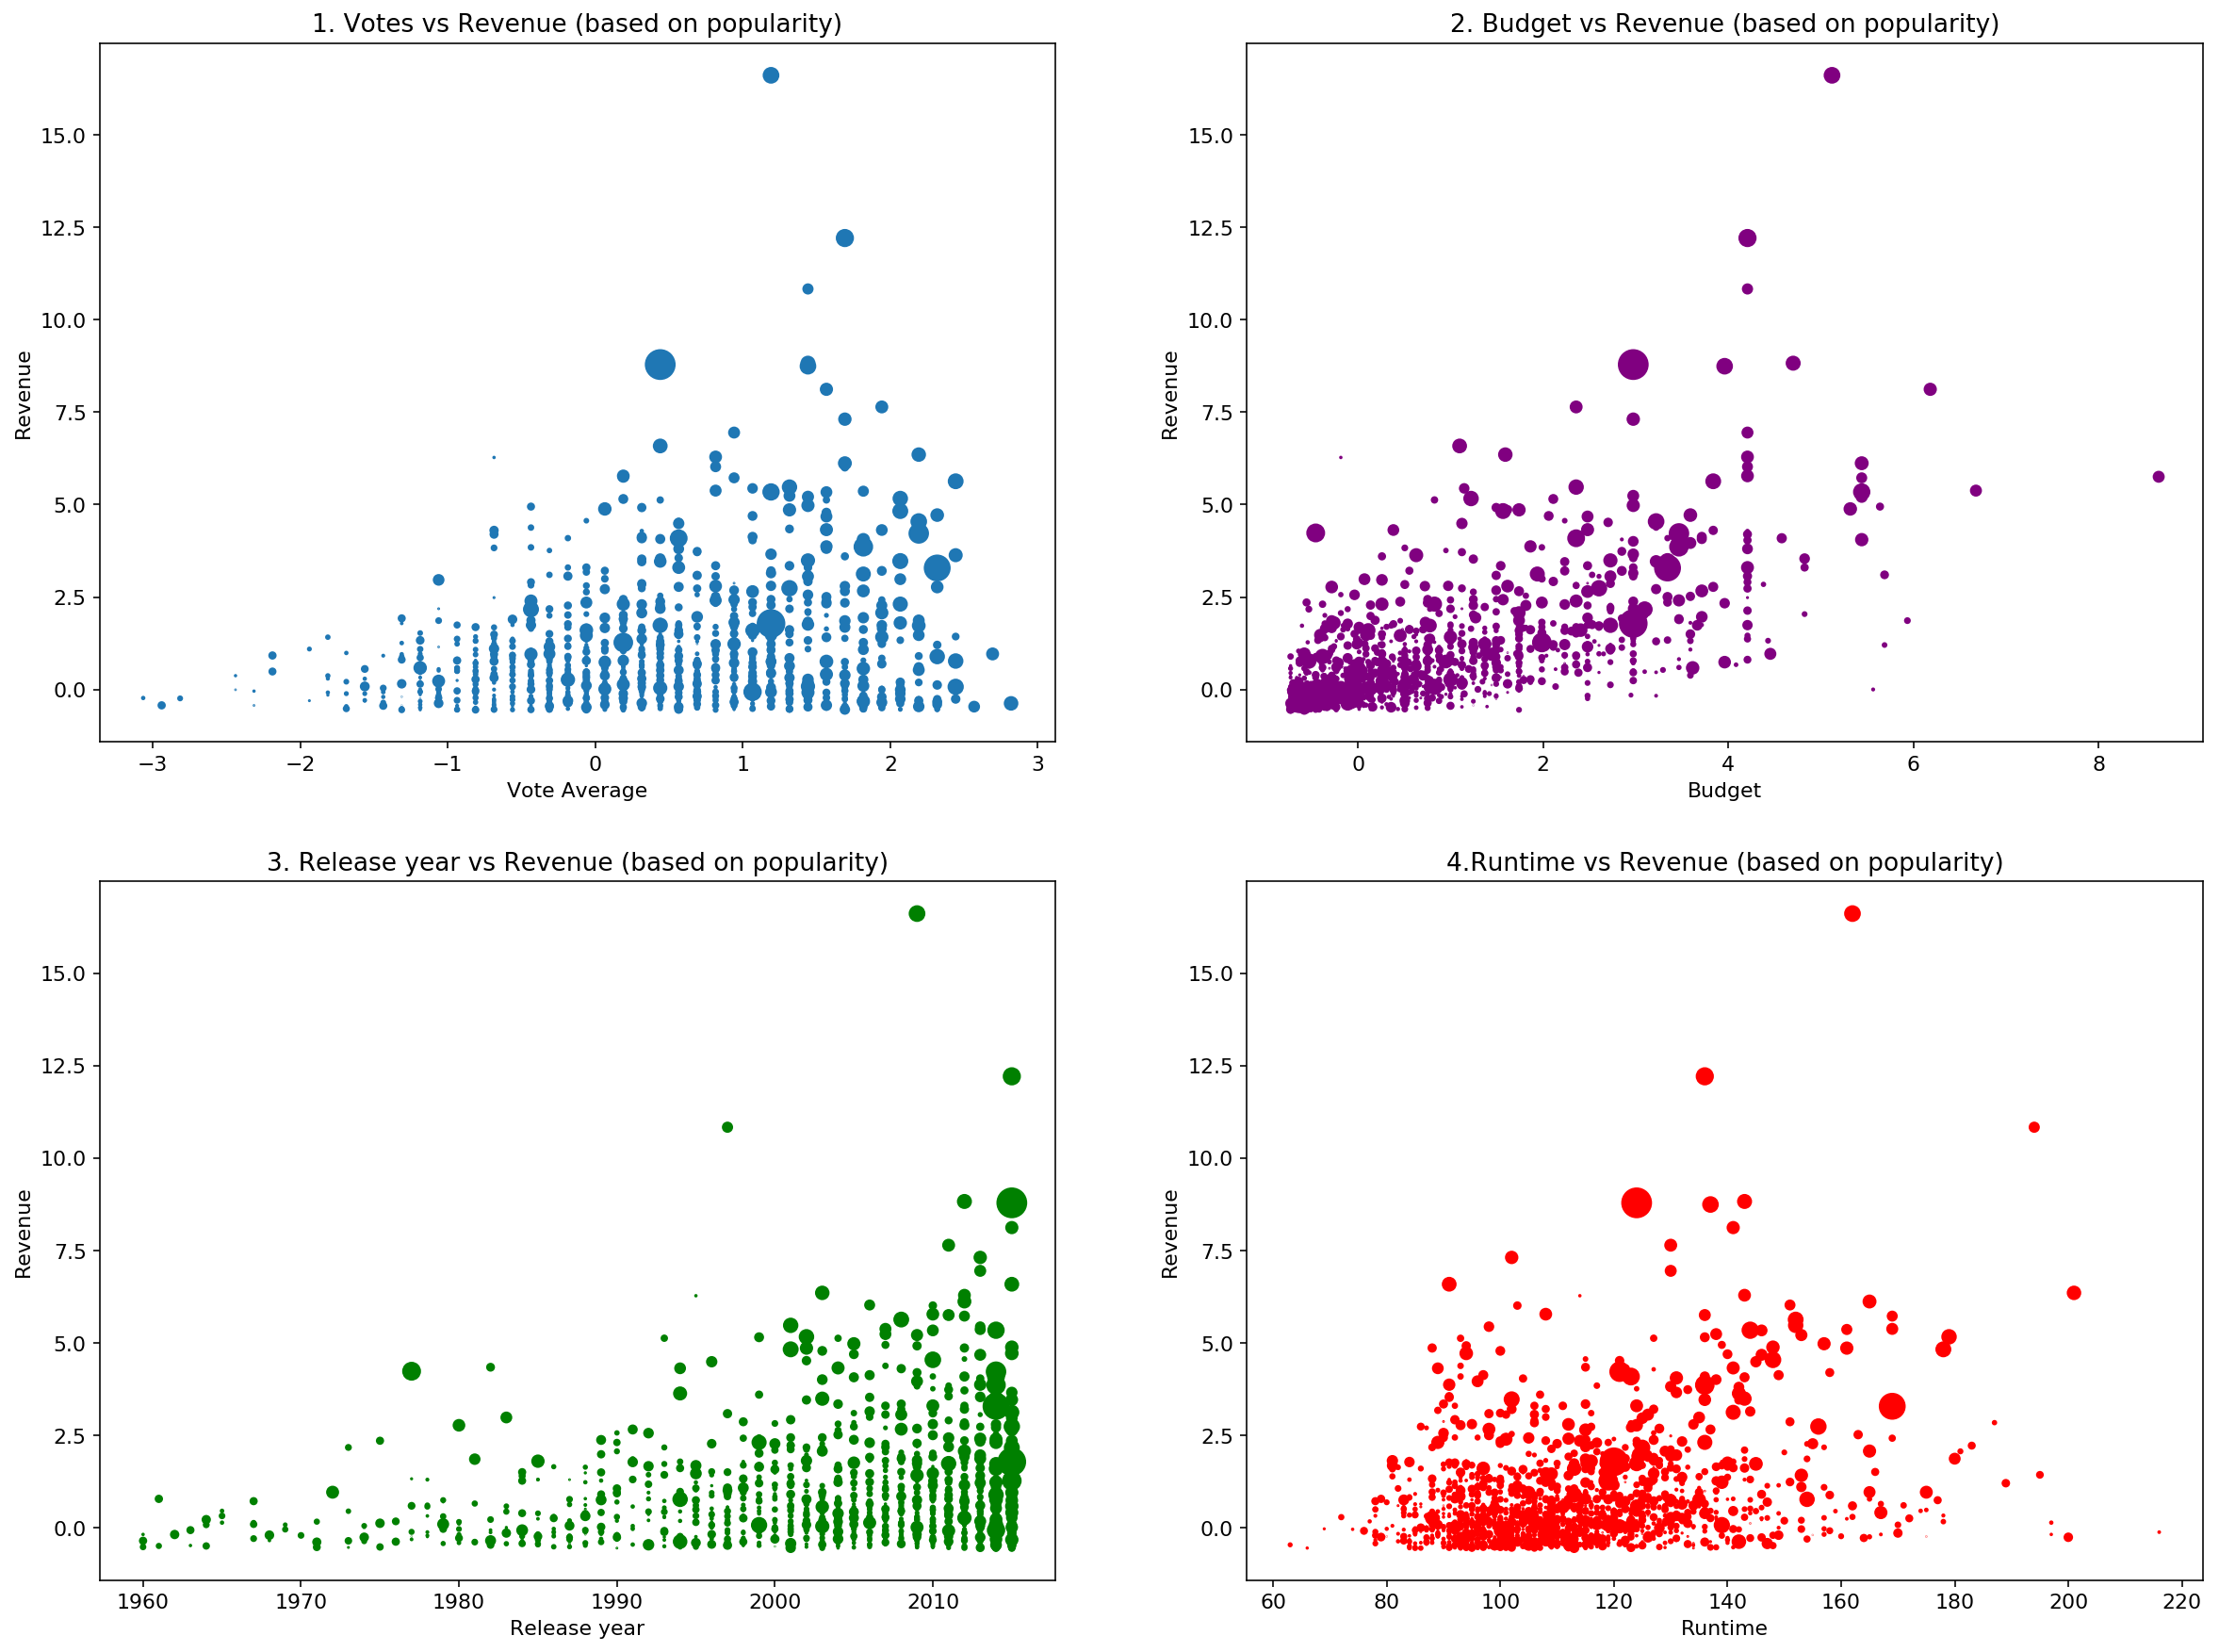

In [82]:
f, axarr = plt.subplots(2, 2, figsize=(20,15))

# Note: The marker size 'scale' indicates the popularity of the movie. 
# It is increased by a factor of 10 for better plot analysis.
scale = TMDB_Q3_data['popularity']*10

# Plot 1: Votes vs Revenue (based on popularity)
axarr[0, 0].scatter( TMDB_Q3_data['vote_average'], TMDB_Q3_data['revenue'], s=scale)
axarr[0, 0].set_title('1. Votes vs Revenue (based on popularity)')
axarr[0, 0].set_xlabel('Vote Average')
axarr[0, 0].set_ylabel('Revenue')

# Plot 2: Budget vs Revenue (based on popularity)
axarr[0, 1].scatter( TMDB_Q3_data['budget'], TMDB_Q3_data['revenue'], s=scale, color='purple')
axarr[0, 1].set_title('2. Budget vs Revenue (based on popularity)')
axarr[0, 1].set_xlabel('Budget')
axarr[0, 1].set_ylabel('Revenue')

# Plot 3: Release year vs Revenue (based on popularity)
axarr[1, 0].scatter( TMDB_Q3_data['release_year'], TMDB_Q3_data['revenue'], s=scale, color='g')
axarr[1, 0].set_title('3. Release year vs Revenue (based on popularity)')
axarr[1, 0].set_xlabel('Release year')
axarr[1, 0].set_ylabel('Revenue')

# Plot 4: Runtime vs Revenue (based on popularity)
axarr[1, 1].scatter(TMDB_Q3_data['runtime'], TMDB_Q3_data['revenue'], s=scale, color='r')
axarr[1, 1].set_title('4.Runtime vs Revenue (based on popularity)')
axarr[1, 1].set_xlabel('Runtime')
axarr[1, 1].set_ylabel('Revenue')

plt.show()

A brief description of the above plots,

**Plot 1: Votes vs Revenue (based on popularity)**

*Do popular movies with higher vote averages achieve higher revenues?*

I can't find a relationship here. The revenues don't seem to change with higher vote average.

**Plot 2: Budget vs Revenue (based on popularity)**

*Do higher investments on popular movies result in higher revenues?*

The revenues do **increase slightly** at higher levels but the number of movies with high budgets seem scarce. There is a good **possibility** that movies with higher investments result in better revenues.

**Plot 3: Release year vs Revenue (based on popularity)**

*How do popular movies of the current millennium compare to the old movies?*

I can find a good relationship here. Most of the **popular movies with high revenues** are visualised **after the year 2000**. This is a **clear indication** that movies recently produced by the industry are the **popular** and **generate higher revenues**.

**Plot 4: Runtime vs Revenue (based on popularity)**

*Do popular movies with higher runtimes generate higher revenues?*

I can't find a relationship here. The revenues don't seem to change with higher movie runtimes.

#### Plot 5: Genres vs Revenue:
Further, I would like to analyse which movie genres have the highest revenues. I will continue analysing the data below.

In [83]:
# Unpack the genres lists using the function created in Question 1
unpacked_df = unpack_list(TMDB_Q3_data.dropna(), "revenue", "genres")
unpacked_df.head()

,genres,revenue
0,Action,8.788316
1,Adventure,8.788316
2,Science Fiction,8.788316
3,Thriller,8.788316
4,Action,1.784529


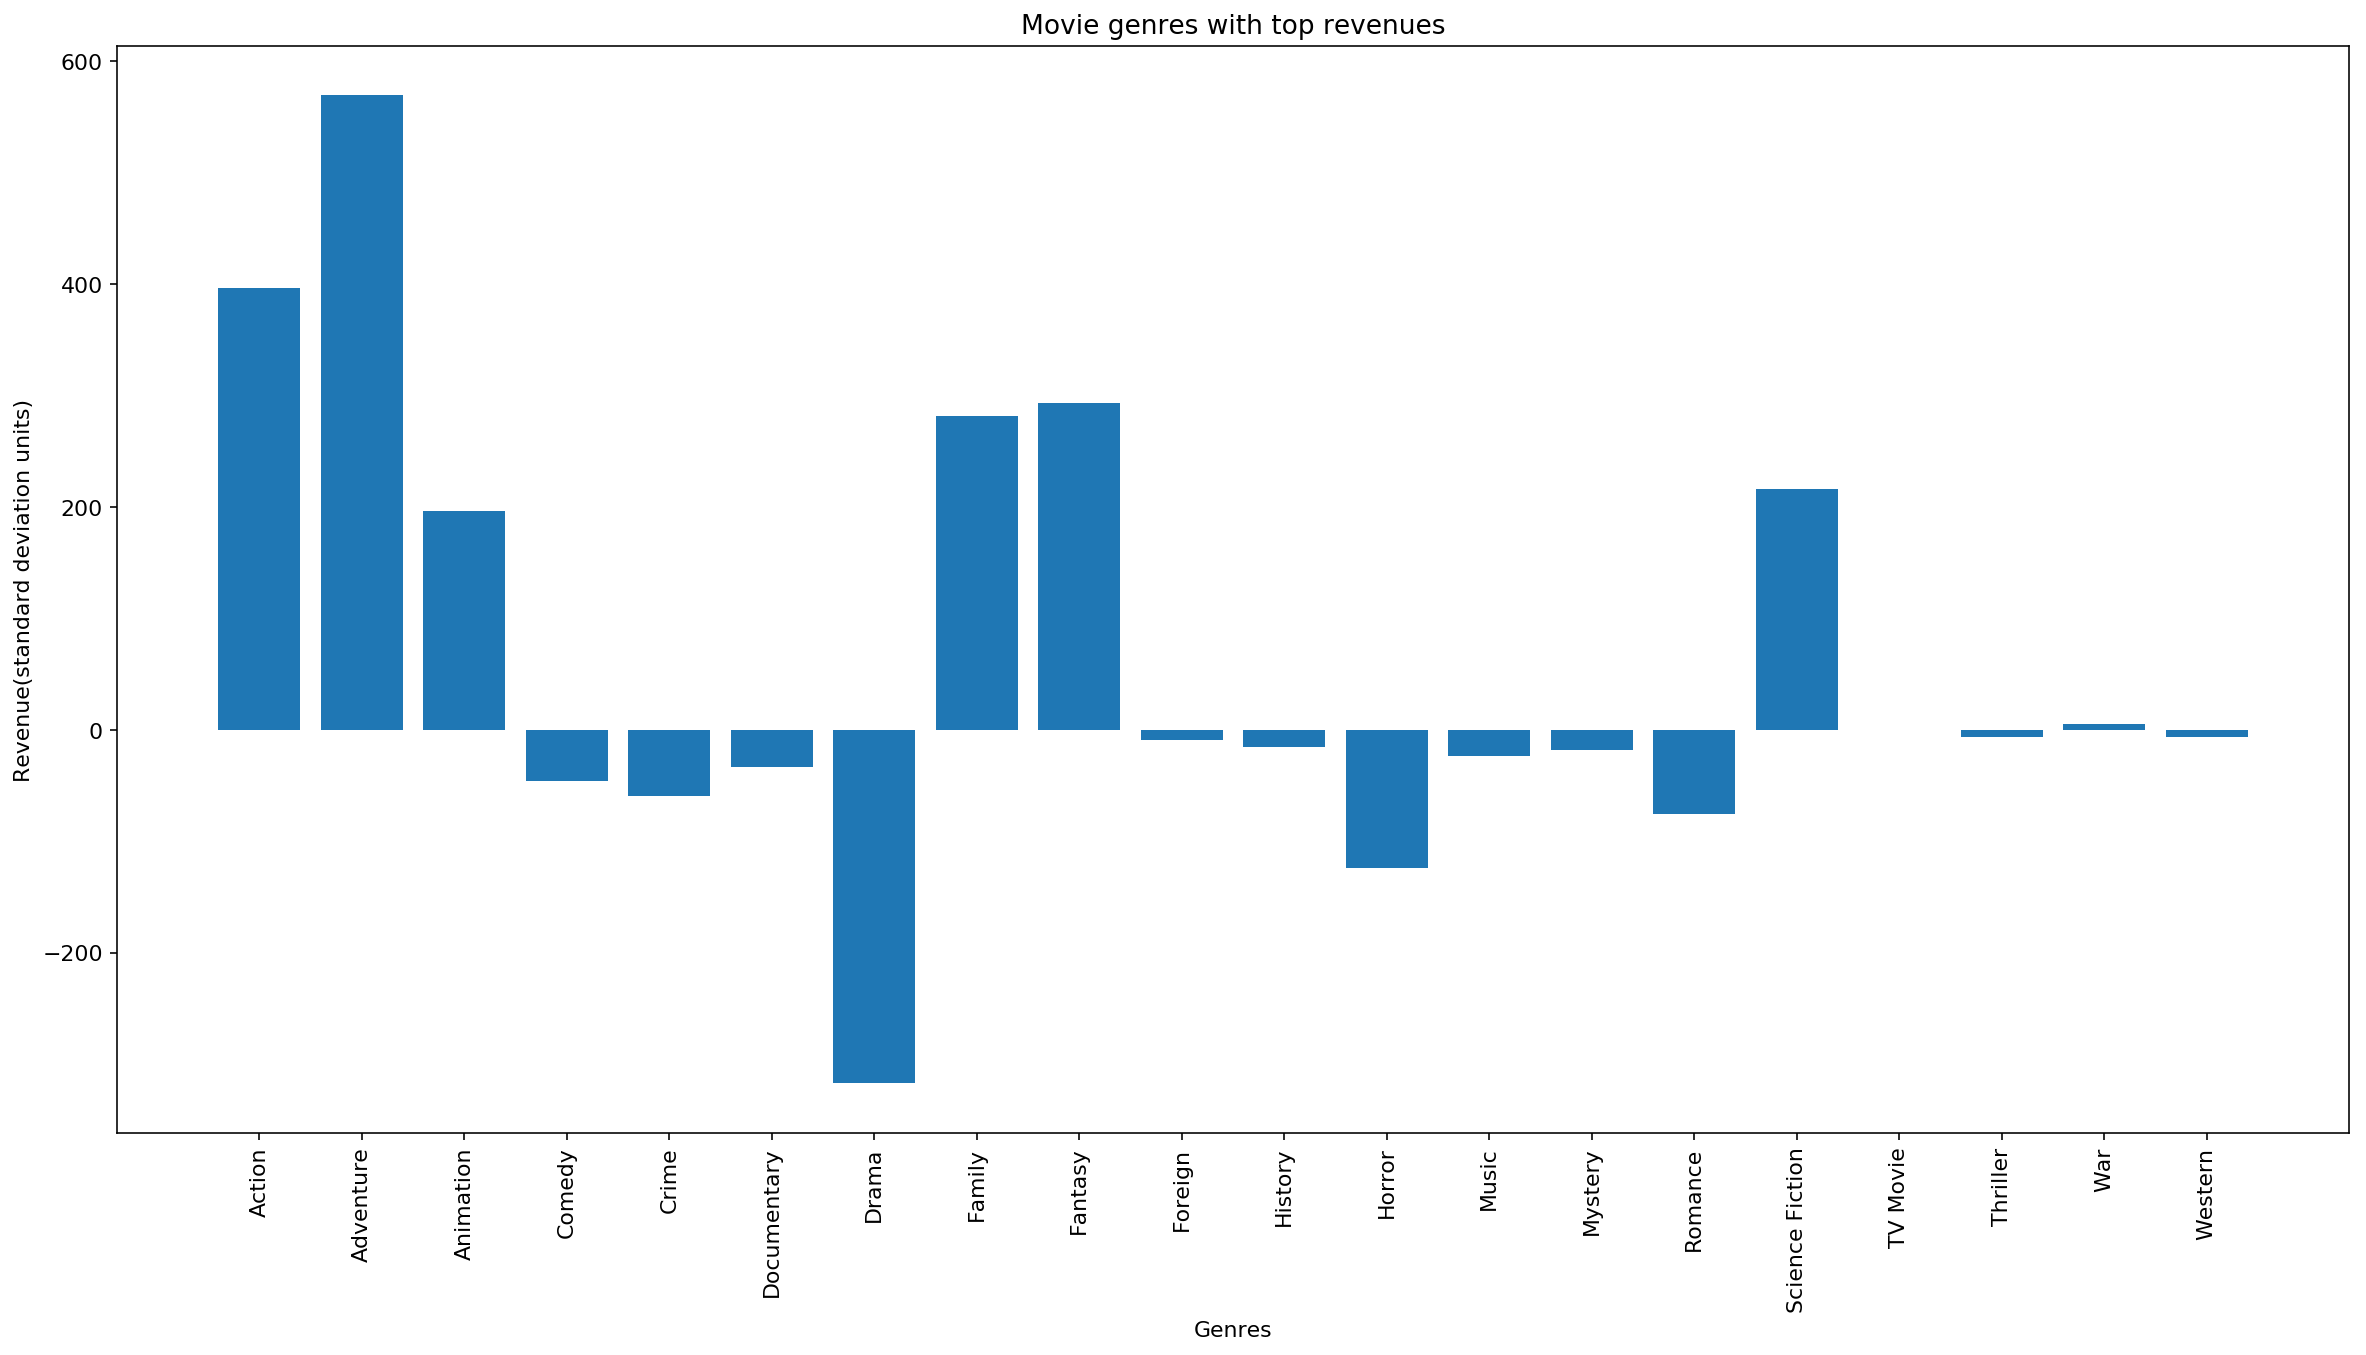

In [84]:
# Data for the plot
# The data is grouped by genres and the total sum of all revenues is considered
# Note that revenue is in standard deviation units
Plot_Data = unpacked_df.groupby('genres').agg({'revenue':'sum'}).rename(columns={'revenue':'total_revenue'}).reset_index()
plt.figure(figsize=(20,10))
plt.bar(Plot_Data['genres'], Plot_Data['total_revenue'])
plt.xticks(rotation='vertical')
# Plot title, x label and y label
plt.title('Movie genres with top revenues')
plt.xlabel('Genres')
plt.ylabel('Revenue(standard deviation units)')
plt.show()

The above plot shows the genres with high revenues(top 5%). It shows that adventure movies have the highest revenues closely followed action movies.

#### Conclusion for question 3:
I can conclude the following from my analysis of the dataset:
1. Popular movies with higher budgets may have higher revenues.
2. Movies after the year 2000 have high revenues and popularity when compared to the previous decades
3. Movies of the action and adventure genre form a large part of movies with the highest revenues.

### Research Question 4  
**How do independent films compare to mainstream movies in terms of popularity?**

I'll first retrieve information about independent films from the dataset.

In [85]:
# Data of independent films
TMDB_independent_data = TMDB_Q4_data[TMDB_Q4_data["independent"]==True]
TMDB_independent_data.head()

,release_year,popularity,independent
350,2015,0.336107,True
433,2015,0.236709,True
579,2015,0.079491,True
613,2015,0.030113,True
695,2014,2.260131,True


Next, I'll retrieve information about mainstream movies

In [86]:
# Data of mainstream films
TMDB_mainstream_data = TMDB_Q4_data[TMDB_Q4_data["independent"]==False]
TMDB_mainstream_data.head()

,release_year,popularity,independent
0,2015,32.985763,False
1,2015,28.419936,False
2,2015,13.112507,False
3,2015,11.173104,False
4,2015,9.335014,False


I will now group the data by the release year and get a mean of the popularity.

In [87]:
# Yearly data on the popularity of independent films
Independent_YoY=TMDB_independent_data.groupby('release_year')['popularity'].mean()
Independent_YoY.head()

release_year
1960    0.271858
1963    0.337301
1970    0.209070
1971    0.360301
1973    0.144305
Name: popularity, dtype: float64

In [88]:
# Yearly data on the popularity of mainstream movies
Mainstream_YoY = TMDB_mainstream_data.groupby('release_year')['popularity'].mean()
Mainstream_YoY.head()

release_year
1960    0.488386
1961    0.446321
1962    0.465245
1963    0.534490
1964    0.421091
Name: popularity, dtype: float64

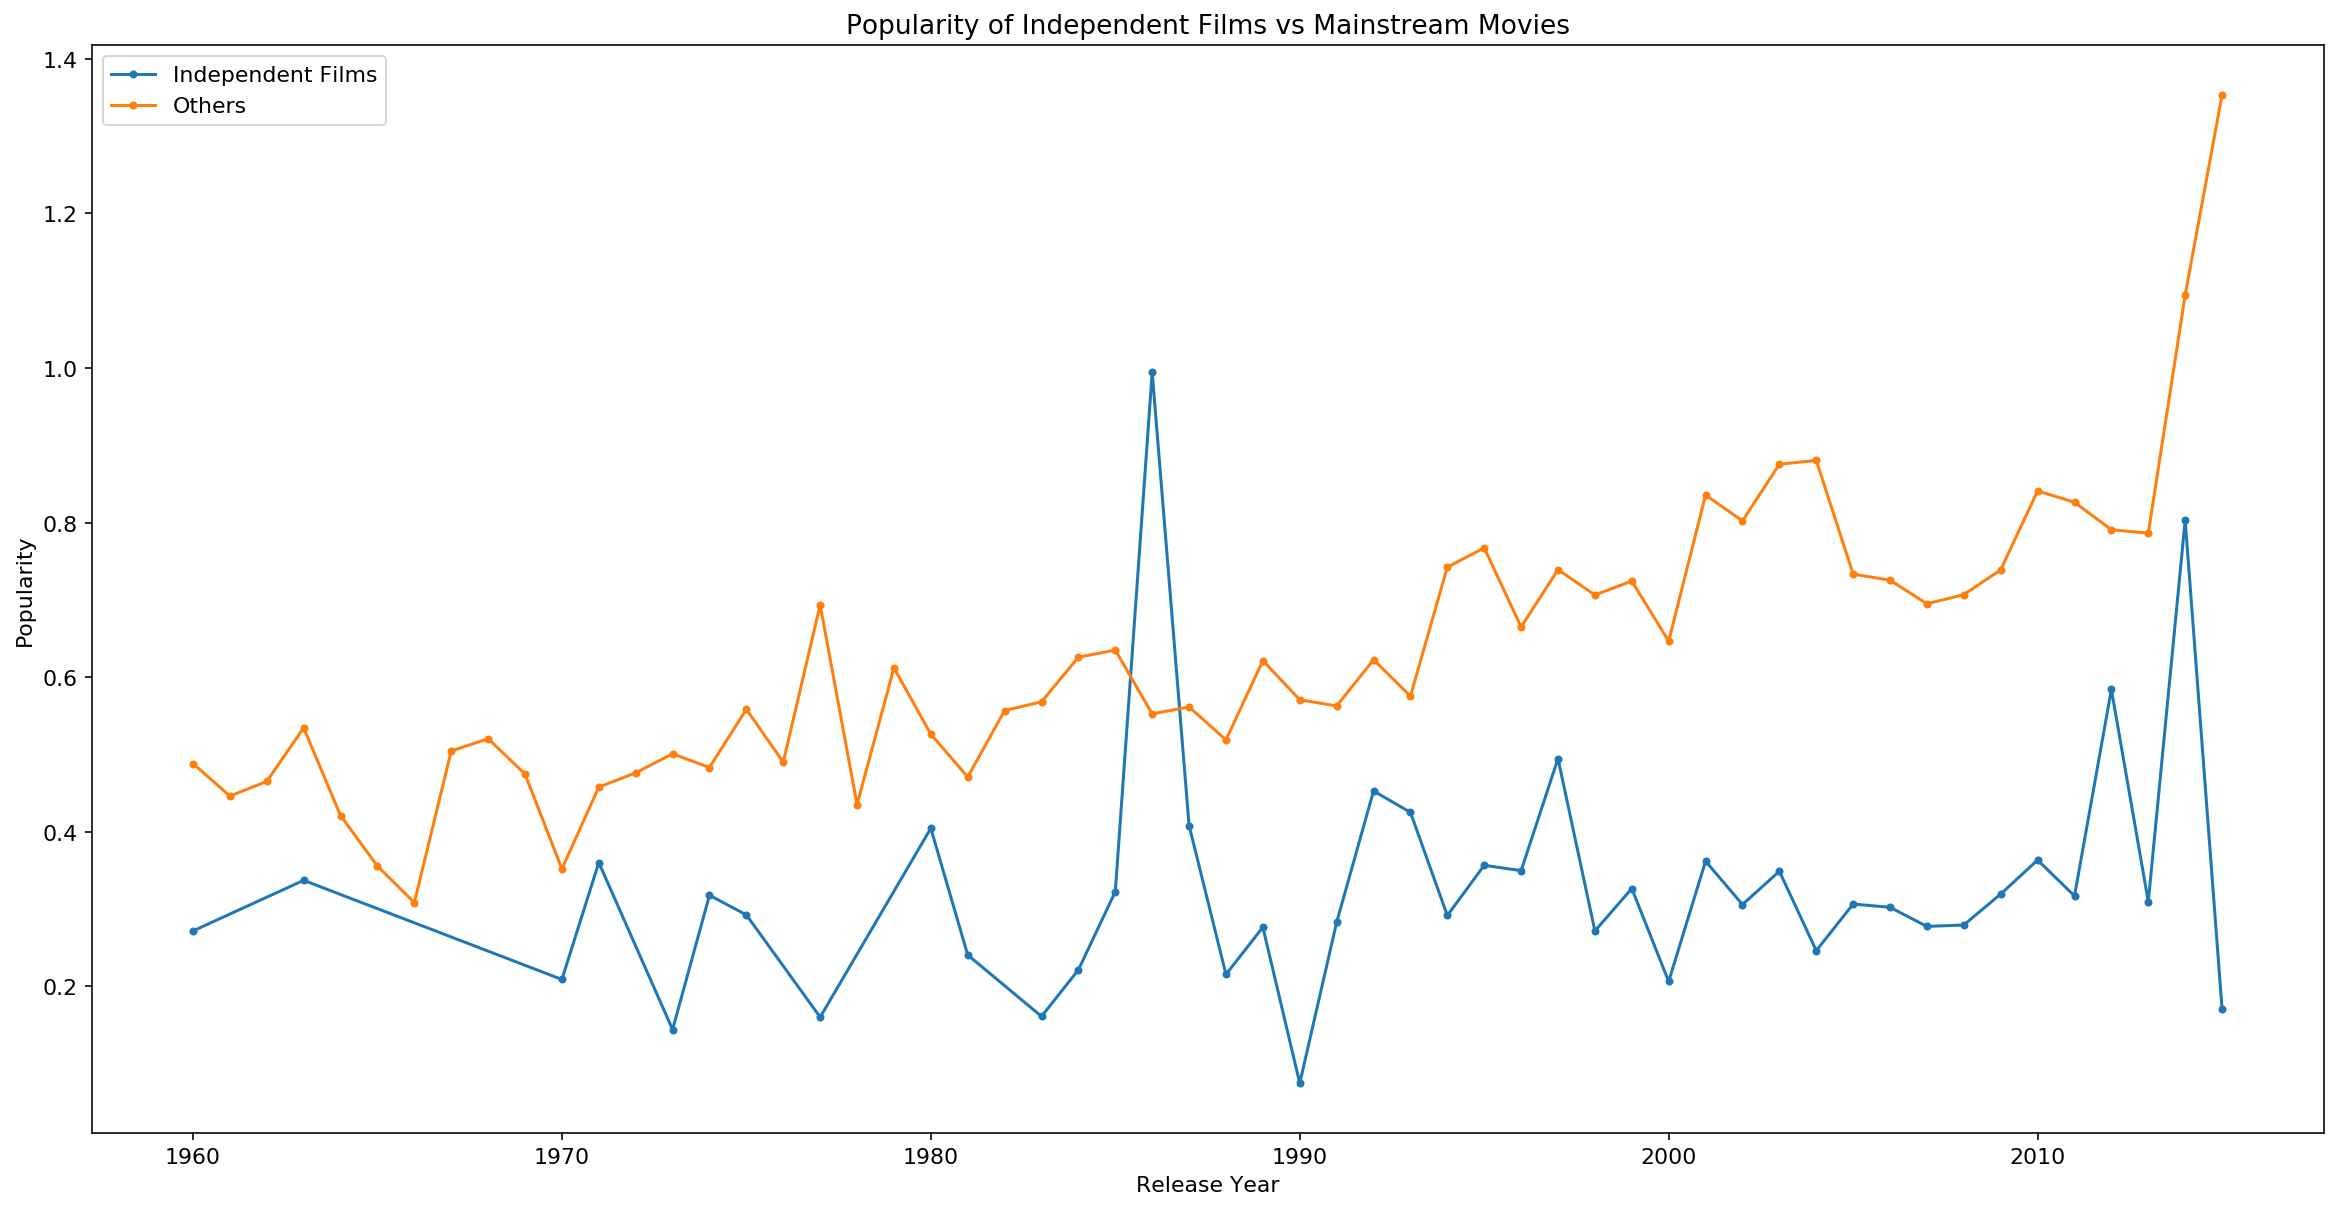

In [89]:
# Plot of the data
ax = Independent_YoY.plot(legend= True,style='.-')
Mainstream_YoY.plot(legend= True, figsize=(20,10),style='.-')
# Legend information
ax.legend(['Independent Films', 'Others'])
# Set the x-label, y-label and title of the plot
ax.set_title('Popularity of Independent Films vs Mainstream Movies')
ax.set_xlabel('Release Year')
ax.set_ylabel('Popularity')
plt.show()

The above plot and dataset show that independent films were non-existent until **1977** and haven't surpassed the popularity of mainstream movies since **1986**. The plot also shows that the popularity of mainstream movies have **record highs in 2015**.

I will also consider the data of the number of independent and mainstream movies to solidify the basis of my conclusion.

In [90]:
# Yearly data on the number of independent films
Independent_YoY_Count=TMDB_independent_data.groupby('release_year')['independent'].count()
Independent_YoY_Count.head()

release_year
1960    1
1963    3
1970    1
1971    2
1973    1
Name: independent, dtype: int64

In [91]:
# Yearly data on the number of mainstream movies
Mainstream_YoY_Count = TMDB_mainstream_data.groupby('release_year')['independent'].count()
Mainstream_YoY_Count.head()

release_year
1960    29
1961    28
1962    30
1963    30
1964    41
Name: independent, dtype: int64

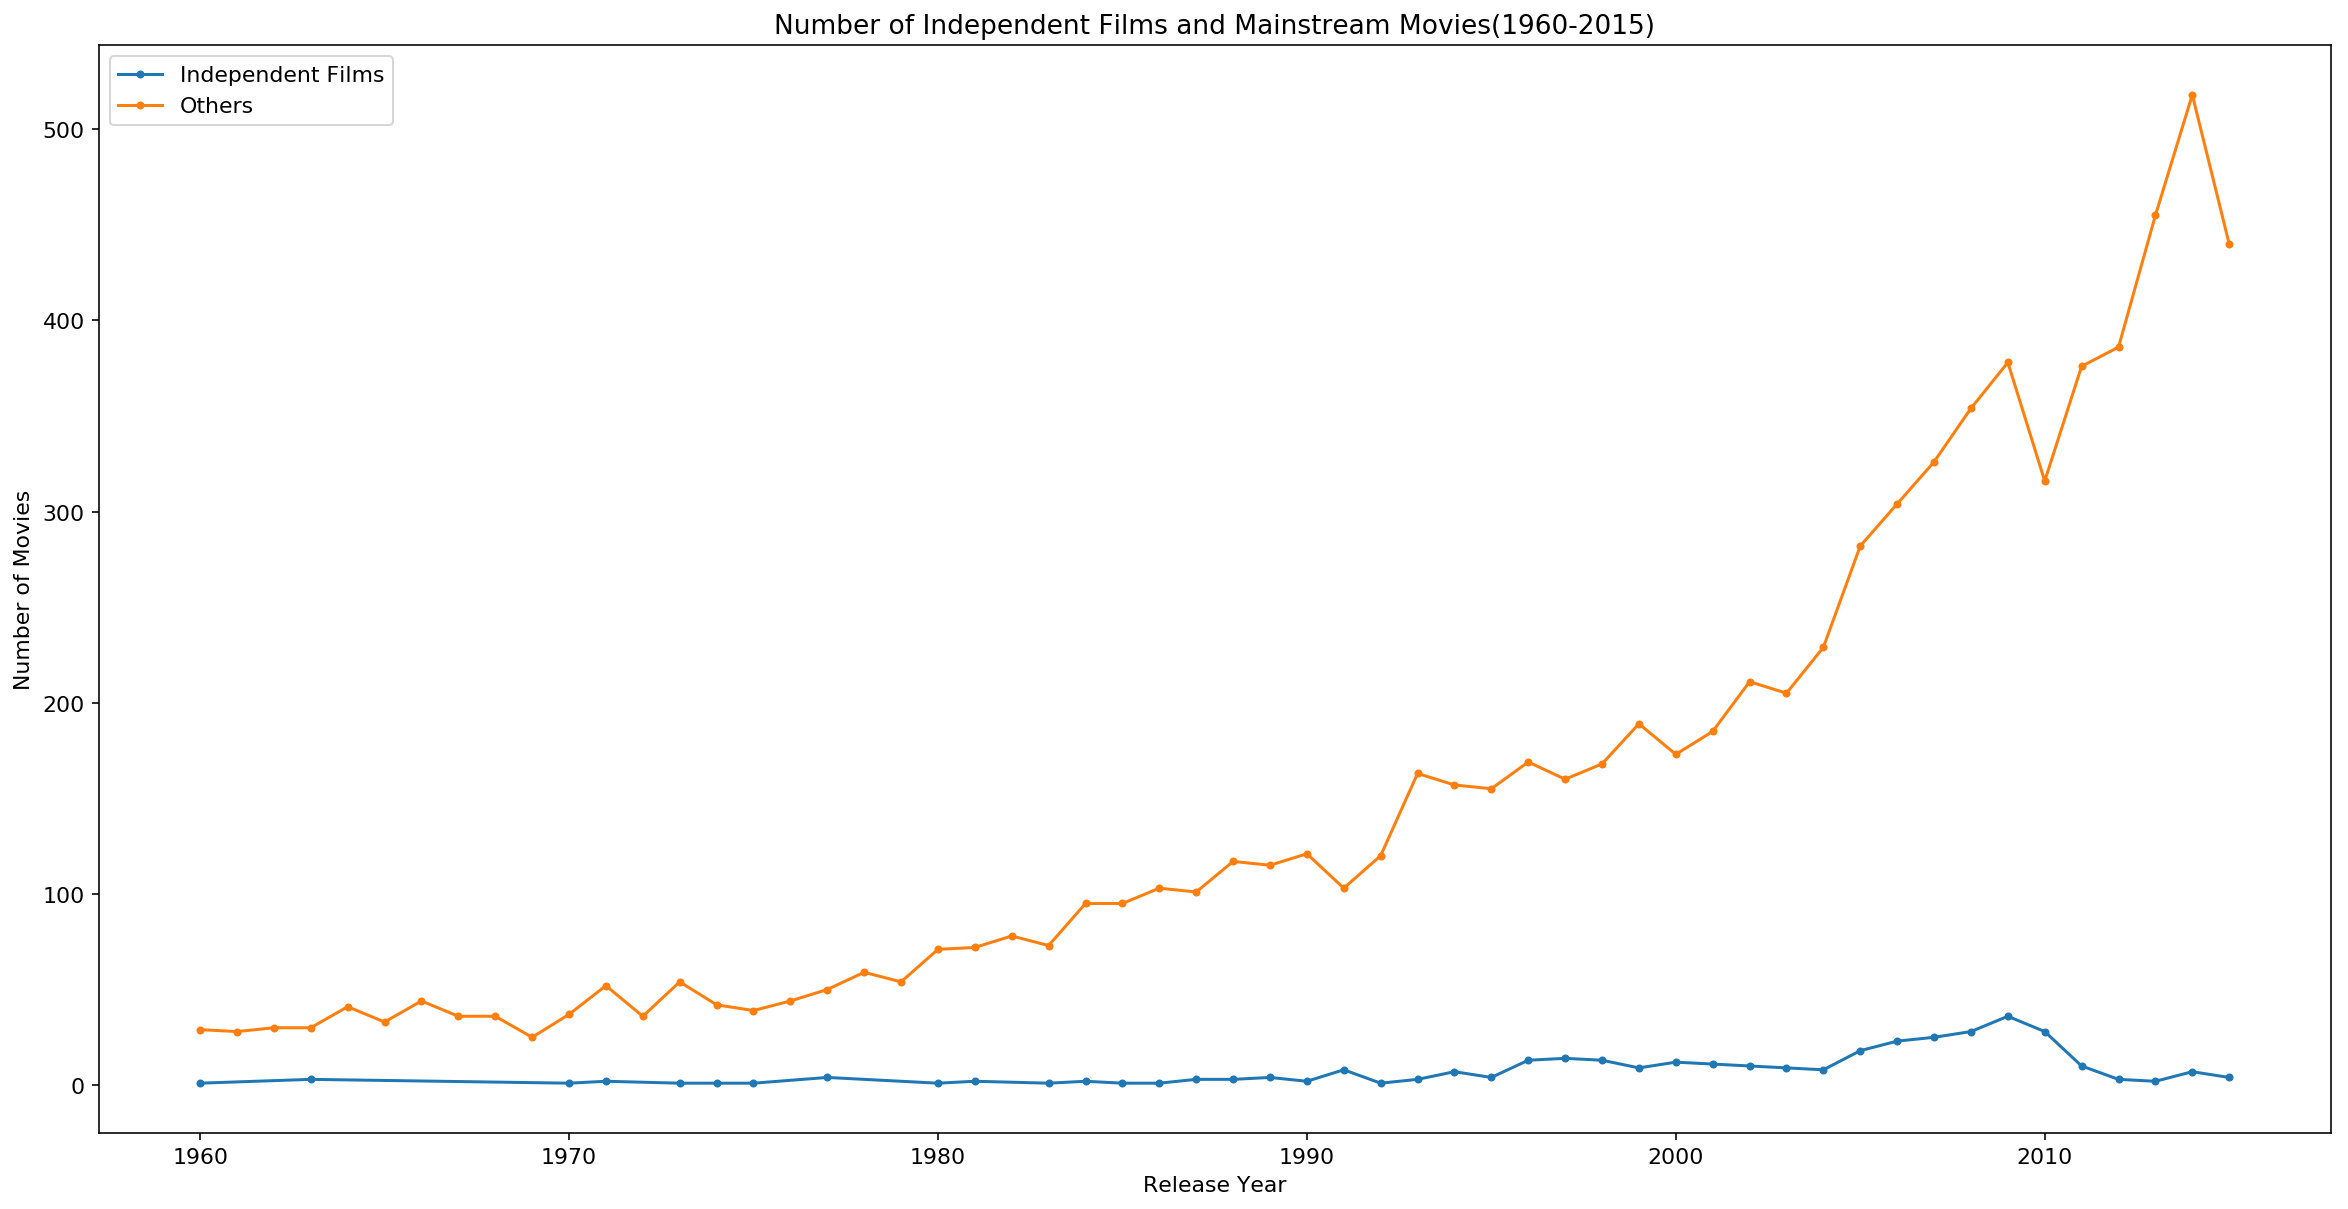

In [92]:
# Plot of the data
ax_count = Independent_YoY_Count.plot(legend= True,style='.-')
Mainstream_YoY_Count.plot(legend= True, figsize=(20,10),style='.-')
ax_count.legend(['Independent Films', 'Others'])
ax_count.set_title('Number of Independent Films and Mainstream Movies(1960-2015)')
ax_count.set_xlabel('Release Year')
ax_count.set_ylabel('Number of Movies')
plt.show()

Over the decades, the number of mainstream movie releases far exceed that of independent films. The number of independent film releases show low variation over the decades.

#### Conclusion for Question 4:
1. Independent movies haven't surpassed the popularity of Mainstream movies over the decades.
2. The average popularity of Mainstrean movies has reached a record high in the year 2015.
3. The number of mainstream movie releases on a yearly basis shows steady growth over the decades.
4. The number of independent movie releases on a yearly basis shows hasn't grown over the decades.

## Conclusions:
   
1.Between the period 1960-2015, movies of the **Drama** genre have had the **highest number of releases** followed by movies of the **Comedy** genre.

*Limitations*:
* I have eradicated all the values for movies with no genres specified. That's a total of 2164 rows. This may have an adverse affect on the results. The margin of error can be found by performing a z-test on the sample(filtered dataset) and the population(the original data). 


2.Movies of the **Action** genre are the **most popular** with movies of the **Adventure** genre coming a close second.

*Limitations*:
* I have used the same filtered data in Question 2 from Question 1. The data is further filtered to include only the **top 5%** of the data in terms of popularity. So the results are based only on the **exceptionally popular** movies. This may also consist of all outliers.


3.Popular movies with **higher budgets** have shown a corresponding increase in the **revenues**.

4.A majority of the popular movies with high revenues were released after the year **2000**.

5.In terms of the genres of popular movies with high revenues, **Adventure** movies are the highest followed by **Action** movies.

*Limitations*:
* For conclusions 3,4 and 5, all the numerical data(except for years) are in standard deviation units. The scatter plots are based on popularity. This means that negative values are excluded from the plots. 
* More than half the rows(exactly 6016) are excluded from the graph due to **zero**(revenue) and **NaN** values. This may result in a **large** margin of error due to lack on information in the dataset. The results can be improved with statistical testing and the availability of the missing information.


6.The average popularity of mainstream movies was highest in **2015**. The average popularity of independent films hasn't surpassed the average popularity of mainstream movies since **1986**.

7.On a yearly basis, the number of **Mainstream movie** releases has shown **steady growth**. On the other hand, **Independent film** releases show **negligible growth** over the decades.

*Limitations*:
* For conclusions 6 and 7, I used the cleaned data for Questions 1 and 2. A total of 1493 rows had no information in the keywords column. Do note that I have considered movies with no information as Mainstream movies and **not excluded** them. This leads to a margin of error and a spike in the number of Mainstream movies.
* For conclusion 6, I have not converted the popularity to standard deviation units. All the data is included while considering the average popularity.

**Other Limitations**:
* During the data cleaning process, I **split the data seperated by '|' into lists** for easy parsing during the exploration phase. This increases the time taken during cleaning and considerably reduces the time taken during the exploration phase.

## Additional Resources:
    
1. https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
3. https://stackoverflow.com/questions/20297332/python-pandas-dataframe-retrieve-number-of-columns
4. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
5. https://stackoverflow.com/questions/38078029/unpack-the-list-element-of-dataframe
6. https://matplotlib.org/examples/pylab_examples/subplots_demo.html